### Librerías

In [15]:


# %matplotlib widget

In [16]:
import sys
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np


sys.path.append(
    "/Users/oscarjimenezbou/Library/Mobile Documents/com~apple~CloudDocs/Documents/University_projects/TDS"
)

In [17]:
from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile

### Ejercicio 2.1
- Representar señal en tiempo discreto y continuo 
- calcular la energía por tramas y representarla 

/var/folders/r4/_d0jbzx9629841ty8b0gfn040000gn/T/ipykernel_6255/854162484.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia, mi_voz = wavfile.read(mi_voz_fn)


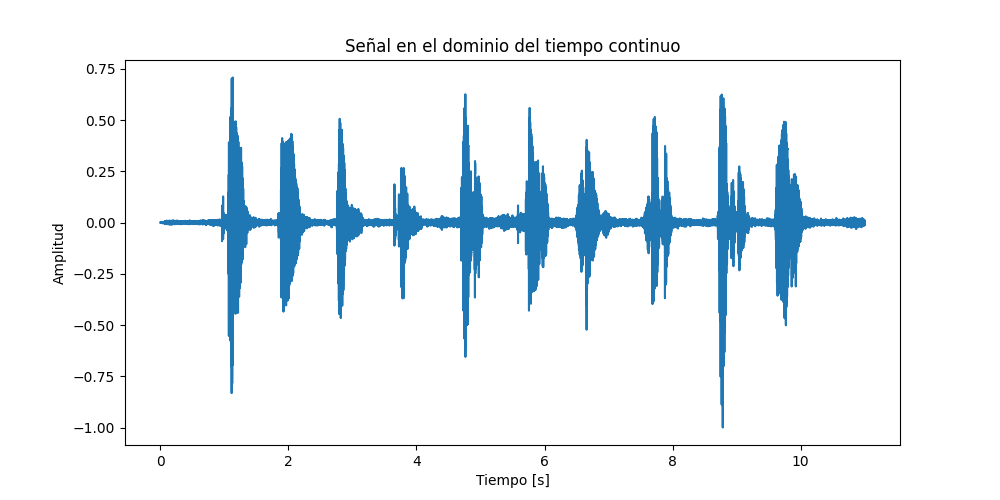

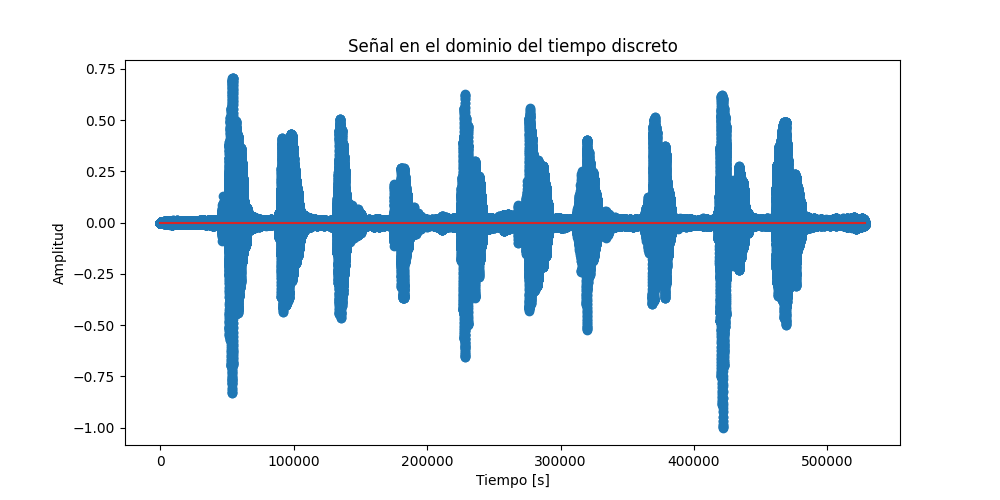

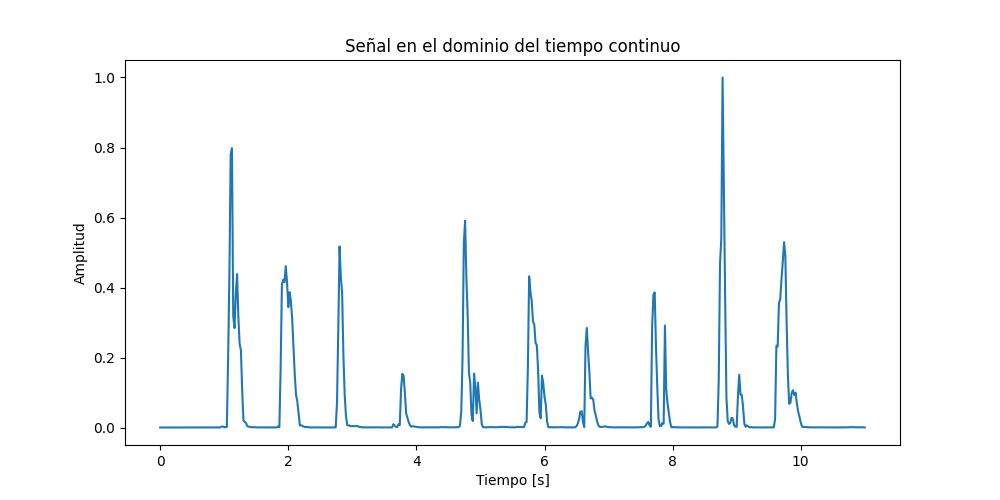

In [18]:
mi_voz_fn = "soundOscar.wav"

# plot the signal in the time domain continous and discrete
frecuencia, mi_voz = wavfile.read(mi_voz_fn)

# Change to mono
if len(mi_voz.shape) > 1:
    mi_voz = mi_voz.mean(axis=1)

# obtain the time vector
tiempo_continuo = np.arange(0, len(mi_voz) / frecuencia, 1 / frecuencia)

# normalize the signal with the maximum value
mi_voz = mi_voz / np.max(np.abs(mi_voz))

# plot the signal in continuous and discrete time
continuous_time_plot(
    tiempo_continuo, mi_voz, variable_name="Señal en el dominio del tiempo continuo"
)

discrete_time_plot(
    mi_voz, variable_name="Señal en el dominio del tiempo discreto"
)

# calculate the energy of the signal each 20ms
energy = []
for i in range(0, len(mi_voz), int(0.02 * frecuencia)):
    energy.append(np.sum(mi_voz[i: i + int(0.02 * frecuencia)] ** 2))

# normalize the energy
energy = energy / np.max(energy)

# plot the energy of the signal each 20ms in the time domain
tiempo_energia = np.arange(0, len(energy) * 0.02, 0.02)
continuous_time_plot(
    tiempo_energia, energy, variable_name="Energía de la señal cada 20ms"
)

# %matplotlib inline

### Ejercicio 2.2
- vector T_limites con inicio y fin de cada dígito en segundos
- vector N_limites  

In [19]:
T_limites = [1.043, 1.4, 1.854, 2.4, 2.744, 3.181, 3.634, 4.1, 4.7,
             5.055, 5.680, 6.04, 6.476, 7.1, 7.553, 7.99, 8.69, 9.224, 9.63, 10.11]